In [1]:
# Importing libraries
import tensorflow as tf
print("Tensorflow version : " , tf.__version__)


Tensorflow version :  2.3.0


In [2]:
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import PIL
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers , optimizers
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model , load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler
from tensorflow.keras import backend as K
from IPython.display import display
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai' , context= 'notebook' , ticks = True , grid =False)


In [3]:
df =  pd.read_csv("emotion.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...


In [4]:
df['pixels'] =  df[' pixels']

In [5]:
df['pixels'][2]

'24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 19 43 52 13 26 40 59 65 12 20 63 99 98 98 111 75 62 41 73 118 140 192 186 187 188 190 190 187 182 176 173 172 173 25 34 29 35 29 26 20 23 19 31 22 21 20 31 26 17 34 75 37 18 38 80 85 25 38 26 34 97 94 76 86 95 70 39 98 129 185 188 188 189 190 190 188 182 176 173 172 173 26 29 25 35 25 30 20 21 16 28 34 26 15 17 19 22 29 62 64 47 45 76 76 78 65 82 12 14 56 56 72 74 66 65 86 129 172 190 187 189 190 190 187 182 177 172 172 174 26 33 32 31 25 33 26 21 16 16 37 27 14 15 12 17 31 38 40 58 73 59 35 82 68 72 43 22 33 52 51 66 71 57 71 121 160 191 188 189 190 190 187 184 178 173 173 174 29 40 29 29 32 32 28 26 19 13 23 34 17 18 14 15 26 25 21 40 82 44 29 34 36 32 36 59 55 38 46 64 71 62 60 107 137 191 189 190 190 190 188 184 178 175 173 175 33 39 25 33 37 33 25 30 20 18 18 23 20 22 20 17 33 20 18 25 37 31 22 29 28 24 29 38 67 38 35 75 68 66 58 89 110 179 191 189 189 190 187 184 179 175 173 174 32 41 32 31 39 33 26 34 27 23 28 30 21 24 29 22 26 23 21

In [6]:
# The input is in the form of string hence we need to convert string into array of pixels of shape (48x48)
def string_to_array(x):
    return np.array(x.split(" ")).reshape(48,48,1).astype('float32')


In [7]:
df['pixels'] = df['pixels'].apply(lambda x : string_to_array(x))


In [8]:
df['pixels'][2].shape

(48, 48, 1)

In [9]:
df['pixels'][2]

array([[[ 24.],
        [ 32.],
        [ 36.],
        ...,
        [173.],
        [172.],
        [173.]],

       [[ 25.],
        [ 34.],
        [ 29.],
        ...,
        [173.],
        [172.],
        [173.]],

       [[ 26.],
        [ 29.],
        [ 25.],
        ...,
        [172.],
        [172.],
        [174.]],

       ...,

       [[159.],
        [185.],
        [157.],
        ...,
        [157.],
        [156.],
        [153.]],

       [[136.],
        [157.],
        [187.],
        ...,
        [152.],
        [152.],
        [150.]],

       [[145.],
        [130.],
        [161.],
        ...,
        [142.],
        [143.],
        [142.]]], dtype=float32)

In [10]:
# checking for null values
df.isnull().sum()

emotion    0
 pixels    0
pixels     0
dtype: int64

In [11]:
# y
label_to_text = {0:'anger' , 1:'digust' , 2:'sad' ,3: 'happy' , 4 : 'surpise'}

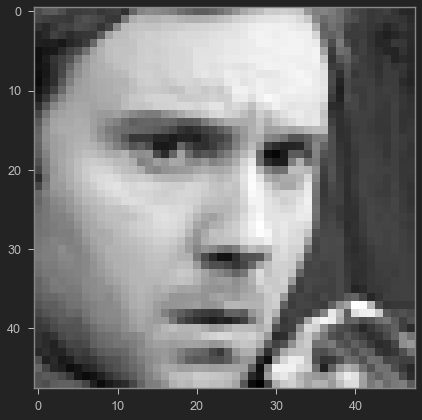

In [12]:
# Visualizing the data
plt.imshow(df['pixels'][0].squeeze() , cmap ='gray')

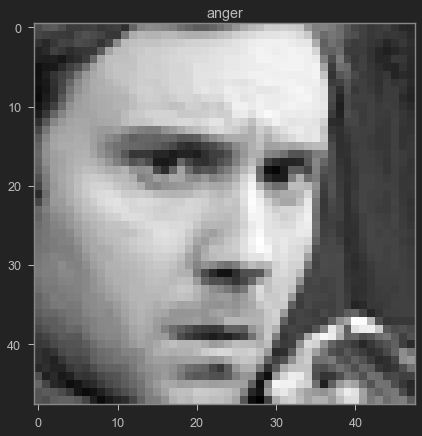

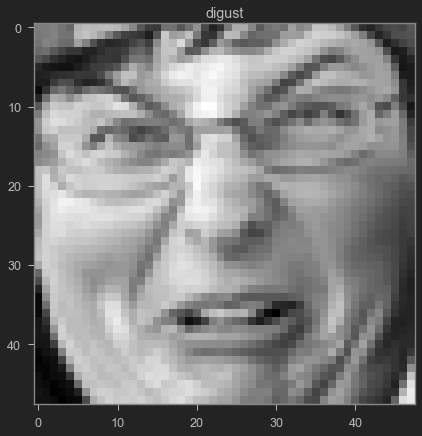

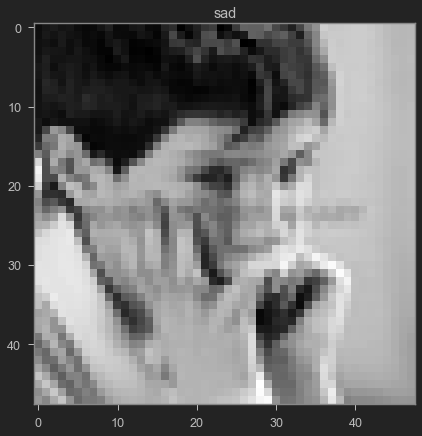

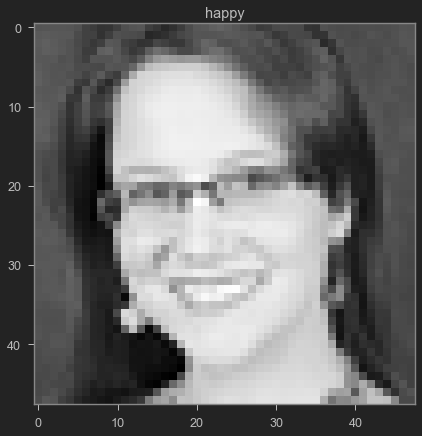

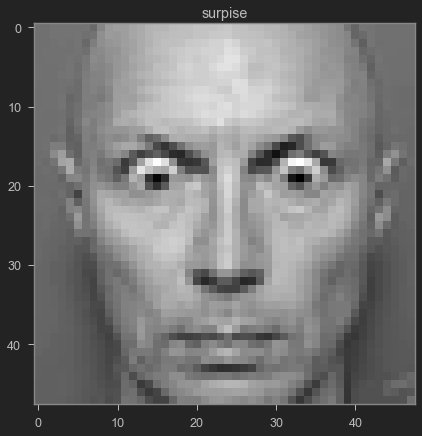

In [13]:
emotions =  [0,1,2,3,4]
for i in emotions:
    data = df[df['emotion'] == i][:1]
    img = data['pixels'].item()
    img = img.reshape(48,48)
    plt.figure()
    plt.title(label_to_text[i])
    plt.imshow(img, cmap= 'gray')

Text(0.5, 1.0, 'Number of images per emotion')

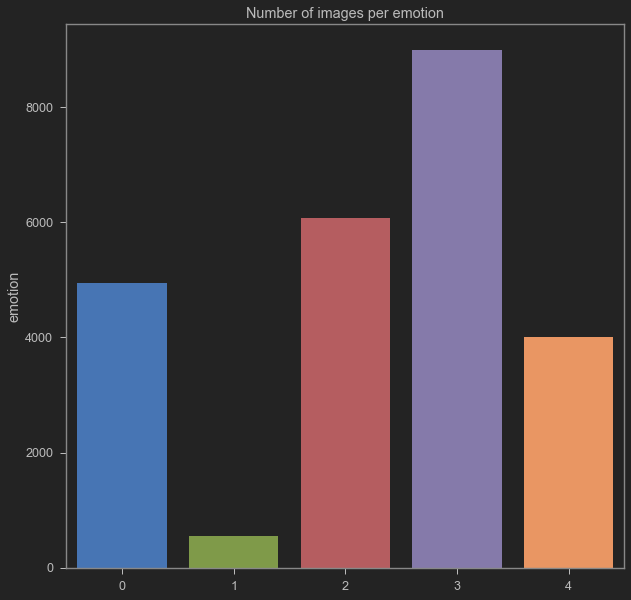

In [14]:
# Counting number of images per emotion
plt.figure(figsize=(10,10))
sns.barplot(x = df.emotion.value_counts().index , y = df['emotion'].value_counts() )
plt.title("Number of images per emotion")

In [15]:
X = df['pixels']
X.shape

(24568,)

In [16]:
# Converting the value of y into one-hot encoder
y  = pd.get_dummies(df['emotion'])
y

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
24563,0,0,0,1,0
24564,1,0,0,0,0
24565,0,0,0,1,0
24566,1,0,0,0,0


In [17]:
X = np.stack(X , axis =0)
X = X.reshape(24568 , 48,48,1)
print( X.shape , y.shape)

(24568, 48, 48, 1) (24568, 5)


In [18]:
X = np.array(X)
y = np.array(y)

In [19]:

x_train , x_test , y_train , y_test = train_test_split(X, y , test_size = 0.1 , shuffle =True)
x_val ,x_test , y_val, y_test = train_test_split(x_test, y_test , test_size = 0.5 , shuffle =True)

In [20]:
print(x_train.shape , y_train.shape)

(22111, 48, 48, 1) (22111, 5)


In [21]:
print(x_test.shape , y_test.shape)

(1229, 48, 48, 1) (1229, 5)


In [22]:
print(x_val.shape , y_val.shape)

(1228, 48, 48, 1) (1228, 5)


In [23]:
# Normalizing the data
x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

In [24]:
# Data Augumentation
train_datagen = ImageDataGenerator(
rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode = "nearest"
)


In [25]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = Dropout(0.1)(X)

  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = Dropout(0.1)(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [26]:
input_shape = (48, 48, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)
X = Dropout(0.3)(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2, 2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 54, 54, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 24, 24, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 24, 24, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [27]:
model_emotion.compile(optimizer = 'Adam'  , loss ='categorical_crossentropy' , metrics = ['accuracy'])

# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "FacialExpression_Myweights.hdf5", verbose = 1, save_best_only=True)

In [28]:
history = model_emotion.fit(train_datagen.flow(x_train, y_train, batch_size=64),
	validation_data=(x_val, y_val), steps_per_epoch=len(x_train) // 64,
	epochs= 55, callbacks=[checkpointer, earlystopping])

Epoch 1/55
345/345 [==============================] - ETA: 0s - loss: 1.4885 - accuracy: 0.3741
Epoch 00001: val_loss improved from inf to 1.60889, saving model to FacialExpression_Myweights.hdf5
345/345 [==============================] - 106s 308ms/step - loss: 1.4885 - accuracy: 0.3741 - val_loss: 1.6089 - val_accuracy: 0.3982
Epoch 2/55
345/345 [==============================] - ETA: 0s - loss: 1.3114 - accuracy: 0.4466
Epoch 00002: val_loss did not improve from 1.60889
345/345 [==============================] - 107s 310ms/step - loss: 1.3114 - accuracy: 0.4466 - val_loss: 1.6160 - val_accuracy: 0.4096
Epoch 3/55
345/345 [==============================] - ETA: 0s - loss: 1.2070 - accuracy: 0.5037
Epoch 00003: val_loss improved from 1.60889 to 1.19883, saving model to FacialExpression_Myweights.hdf5
345/345 [==============================] - 106s 307ms/step - loss: 1.2070 - accuracy: 0.5037 - val_loss: 1.1988 - val_accuracy: 0.5081
Epoch 4/55
345/345 [==============================] 

Epoch 28/55
345/345 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.7360
Epoch 00028: val_loss did not improve from 0.74510
345/345 [==============================] - 114s 330ms/step - loss: 0.6808 - accuracy: 0.7360 - val_loss: 0.9455 - val_accuracy: 0.6295
Epoch 29/55
345/345 [==============================] - ETA: 0s - loss: 0.6795 - accuracy: 0.7362
Epoch 00029: val_loss did not improve from 0.74510
345/345 [==============================] - 114s 329ms/step - loss: 0.6795 - accuracy: 0.7362 - val_loss: 0.8093 - val_accuracy: 0.7093
Epoch 30/55
345/345 [==============================] - ETA: 0s - loss: 0.6661 - accuracy: 0.7412
Epoch 00030: val_loss did not improve from 0.74510
345/345 [==============================] - 114s 329ms/step - loss: 0.6661 - accuracy: 0.7412 - val_loss: 0.8031 - val_accuracy: 0.6987
Epoch 31/55
345/345 [==============================] - ETA: 0s - loss: 0.6668 - accuracy: 0.7401
Epoch 00031: val_loss did not improve from 0.74510
345

In [29]:
# history = model_emotion.fit(train_datagen.flow(x_train, y_train, batch_size=64),
# 	validation_data=(x_val, y_val), steps_per_epoch=len(x_train) // 64,
# 	epochs= 1, callbacks=[checkpointer, earlystopping])

In [30]:
model_json = model_emotion.to_json()
with open("MY_Emotion_model.json","w") as json_file:
    json_file.write(model_json)

In [33]:
with open("MY_Emotion_model.json" , 'r') as json_file:
    json_savedModel = json_file.read()
    

model_emotion = tf.keras.models.model_from_json(json_savedModel)
model_emotion.load_weights('FacialExpression_Myweights.hdf5')
model_emotion.compile(optimizer = "Adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


In [34]:
score = model_emotion.evaluate(x_test , y_test)
print("Test Accuracy: {}".format(score[1]))

39/39 [==============================] - 1s 24ms/step - loss: 0.7014 - accuracy: 0.7356
Test Accuracy: 0.7355573773384094


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


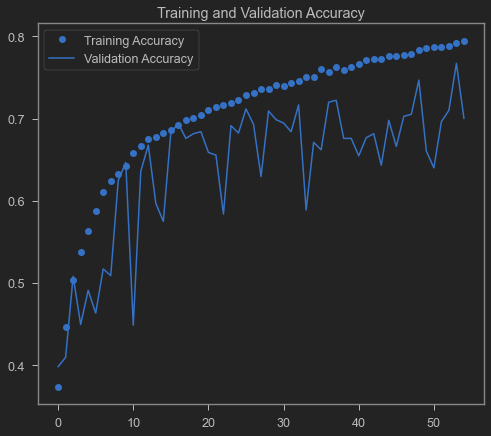

In [37]:
epochs = range(len(accuracy))

plt.plot(epochs , accuracy , 'bo' , label = "Training Accuracy")
plt.plot(epochs , val_accuracy , 'b' , label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

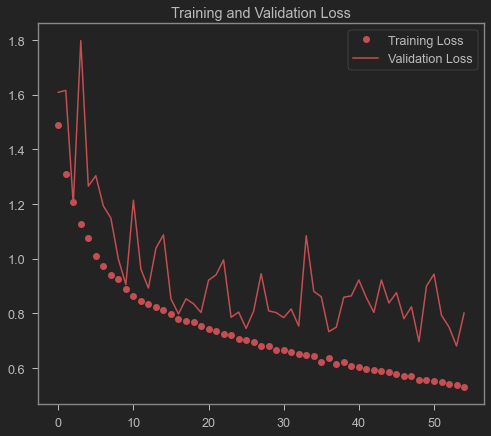

In [38]:
plt.plot(epochs , loss , 'ro' , label = "Training Loss")
plt.plot(epochs , val_loss , 'r' , label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

In [39]:
predict_classes  = np.argmax(model_emotion.predict(x_test), axis = -1)
y_true = np.argmax(y_test , axis = -1)

In [40]:
y_true.shape

(1229,)

<AxesSubplot:>

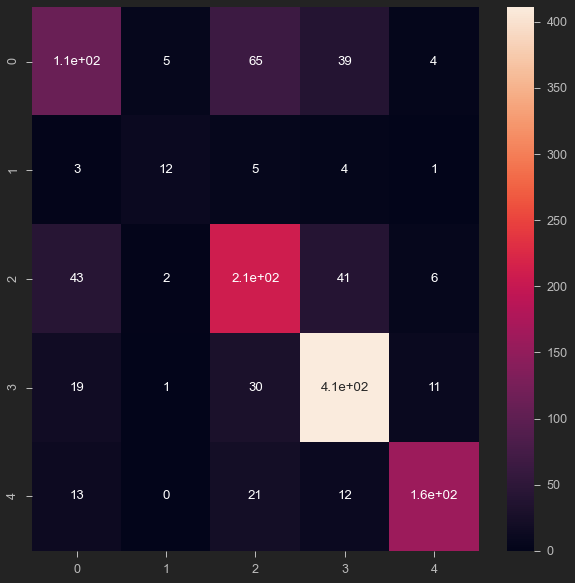

In [41]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_true , predict_classes)
plt.figure(figsize=(10,10))
sns.heatmap(cm , annot = True , cbar = True)


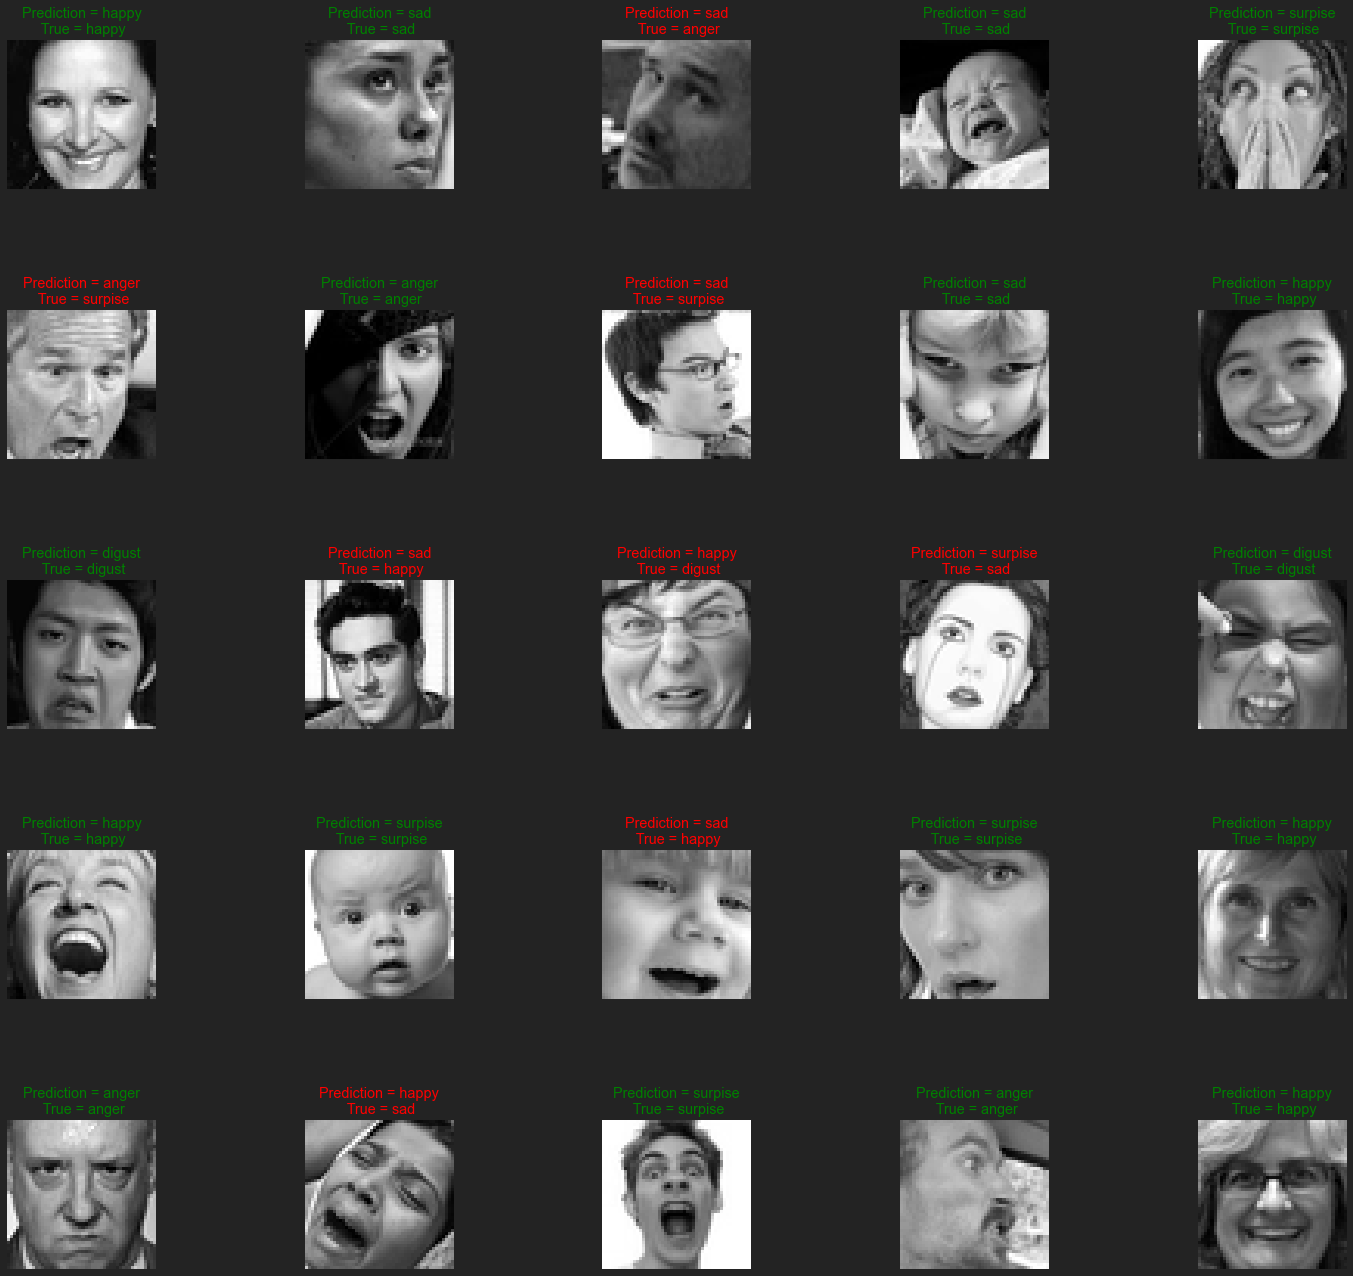

In [42]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i].reshape(48,48), cmap = 'gray')
    col = 'green' if predict_classes[i]==y_true[i] else "red"
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predict_classes[i]], label_to_text[y_true[i]]),color = col)
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_true , predict_classes))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54       224
           1       0.60      0.48      0.53        25
           2       0.63      0.70      0.66       302
           3       0.81      0.87      0.84       472
           4       0.88      0.78      0.82       206

    accuracy                           0.74      1229
   macro avg       0.70      0.66      0.68      1229
weighted avg       0.73      0.74      0.73      1229

